In [2]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import os

PATH = os.getcwd()
PATH

'/home/andre/Documents/Codes/Python/CONTROLE'


s^2 + 1
-------
s^2 + s



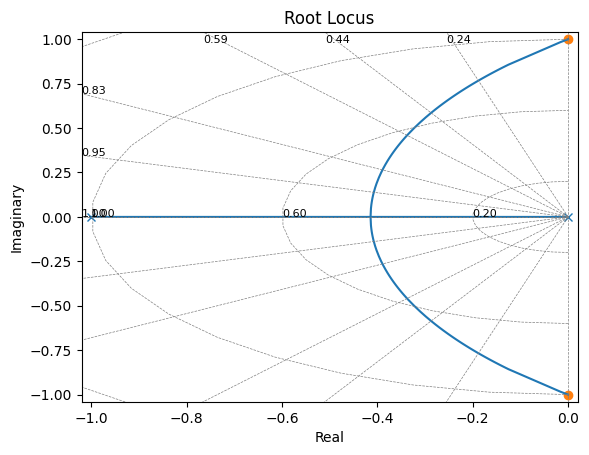

In [34]:
num = [1, 0,1]
den = [1,1,0]
G = ct.TransferFunction(num, den)

print(G)
rlist, klist = ct.rlocus(G)

plt.show()

G = ct.TransferFunction(num, den)

print(G)
rlist, klist = ct.rlocus(G)

plt.show()